0.032631472134307137


C:\Users\chris\AppData\Local\Temp/ipykernel_13268/1902015457.py:33: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


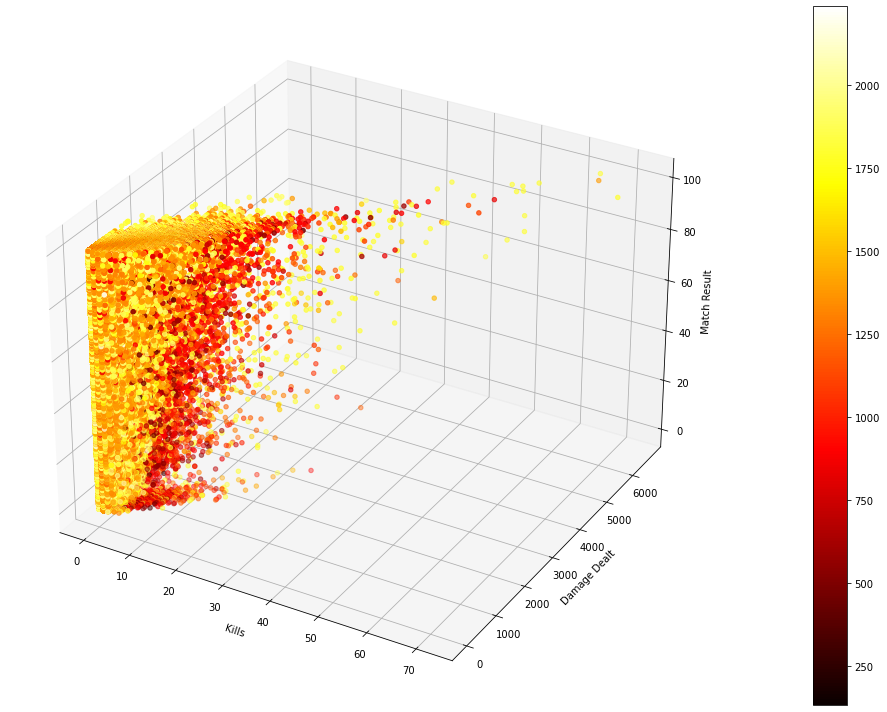

C:\Users\chris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


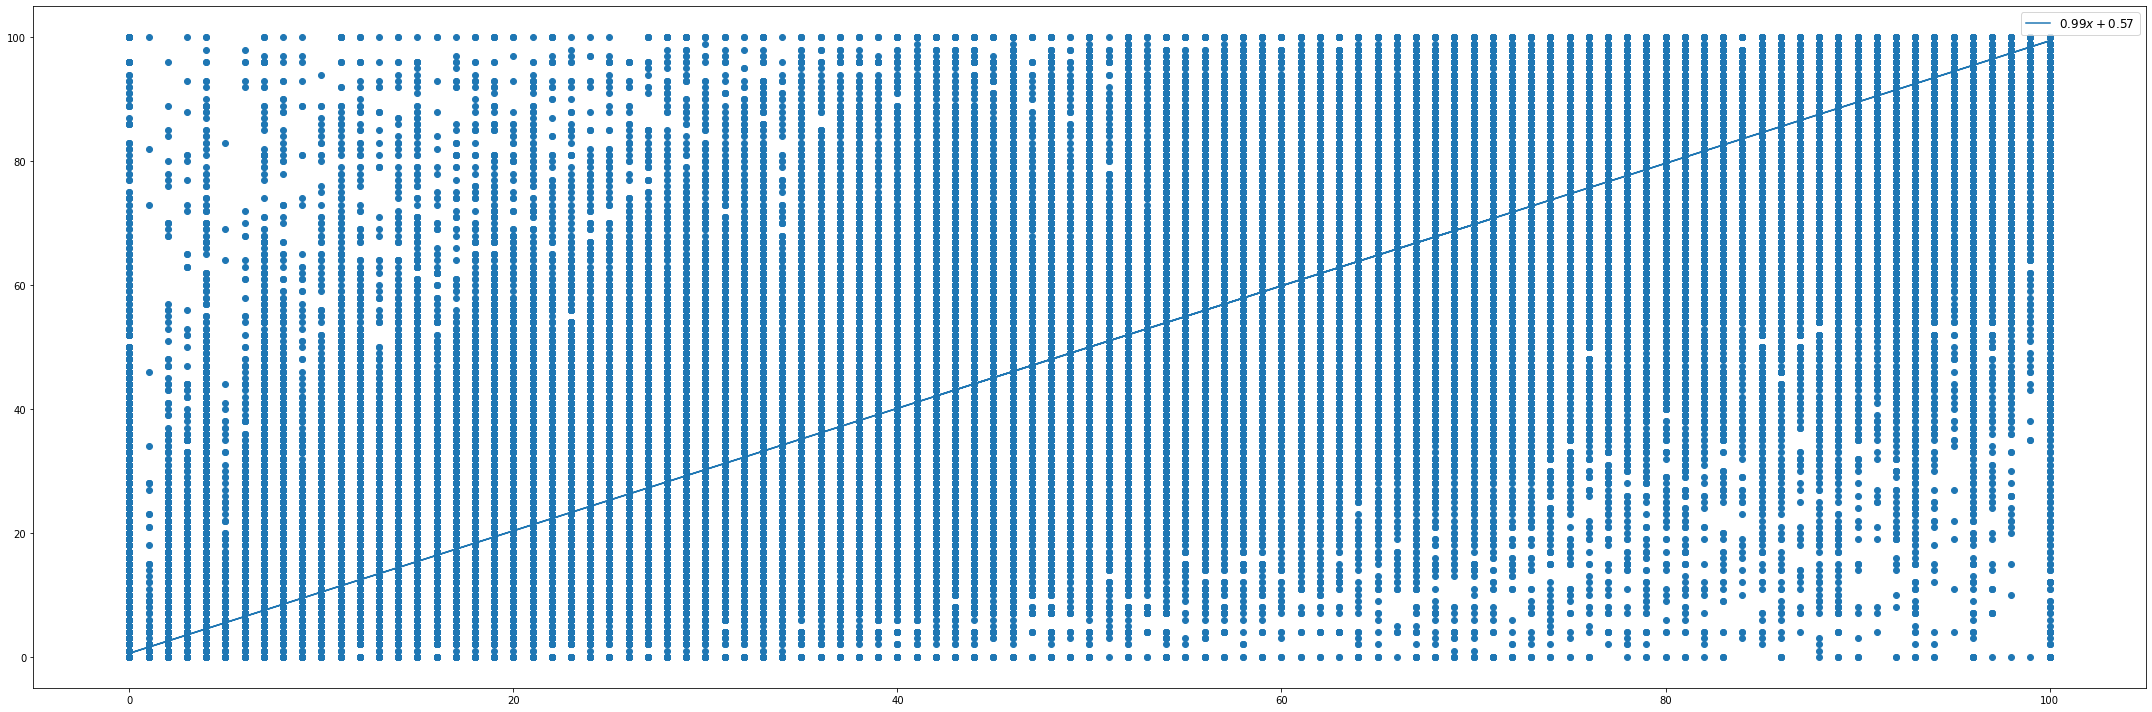

0

In [28]:
import pandas as pd
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import graphviz
import os
from sympy import S, symbols, printing

#Prepare data for graphing
model = load('model.joblib') 
data = pd.read_csv('train_V2.csv')
data.drop(data[(data['kills'] == 0) & (data['damageDealt'] == 0)].index, inplace=True)
data['winPlacePerc'] = round(100 * data['winPlacePerc'], 0)
responseY = data["winPlacePerc"]
explanatoryX = data[["damageDealt","kills", "assists", "walkDistance", "matchDuration"]]
responseY.head()
X_train, X_test, y_train, y_test =  train_test_split(explanatoryX, responseY, test_size=.9999, random_state=5)

# Evaluate the model on the test data
predictions = model.predict(X_test)
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df['Prediction Difference'] = df['Actual'].sub(df['Prediction'], axis = 0)
print(df["Prediction Difference"].mean())
df

plt.rcParams["figure.figsize"] = [30.00, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.gca(projection='3d')
x = df['kills']
y = df['damageDealt']
z = df['Actual']
c = df['matchDuration']
img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel("Kills")
ax.set_ylabel("Damage Dealt")
ax.set_zlabel("Match Result")
plt.show()

dot_data = tree.export_graphviz(model, out_file='tree.dot', max_depth = 4, feature_names = ["damageDealt","kills", "assists", "walkDistance", "matchDuration"], class_names = True, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

#Generate best fit line and scatter and display equation of actual vs predicted values
plt.rcParams["figure.figsize"] = [30.00, 10]
x = df['Actual']
y = df['Prediction']
a, b = np.polyfit(x, y, 1)
p = np.polyfit(x, y, 1)
plt.scatter(x, y)
x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = printing.latex(poly) 
x = df['Actual']
plt.plot(x, a*x+b, label="${}$".format(eq_latex)) 
plt.legend(fontsize="large")
plt.show()

os.system("dot -Tsvg tree.dot -o tree.svg")
